In [8]:
using Plots
using LaTeXStrings
using BoundaryValueDiffEq
using Printf

In [9]:
domain = (0.0, 1.0)
ϵ = 0.1;
ϵ2 = 0.01;

In [10]:
function prob1!(dv, v, p, x)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = -(du + u) / p
end

prob1! (generic function with 1 method)

In [11]:
# Boundary conditions
function bc1!(residual, u, p, t)
    residual[1] = u[1][1] - 1
    residual[2] = u[end][1] - 2
end

bc1! (generic function with 1 method)

In [12]:
# Define the problem and solve for the current epsilon
u0 = [1.0, 0.0]

bvp1 = BVProblem(prob1!, bc1!, u0, domain, ϵ)
bvp2 = BVProblem(prob1!, bc1!, u0, domain, ϵ2)

sol1 = solve(bvp1, MIRK4(), dt = 0.001);
sol2 = solve(bvp2, MIRK4(), dt = 0.001);

In [ ]:
x = collect(LinRange(0,1,1000))
A = 2*ℯ-1
B = -1
z(x, ϵ) = x / ϵ

outer(x, ϵ) = 2*exp.(1-x) - ϵ*(2*exp.(1-x)*(x-1)) 
inner(x, ϵ) = 1 + A*(1 - exp.(-z(x,ϵ)) ) 
# + ϵ*exp.(-z(x,ϵ))*( -A*(1+exp.(z(x,ϵ))*(z(x,ϵ)-1)+z(x,ϵ))-B+exp.(z(x,ϵ))*(B-z(x,ϵ)))
ucp(ϵ) = 2*ℯ*(1-ϵ)

composite(x, ϵ) = outer(x, ϵ) .+ inner(x, ϵ) .- ucp(ϵ)

composite (generic function with 1 method)

In [ ]:
theme(:dao::Symbol)
plt = plot(sol1,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ)$",
    xlabel = L"$x$", 
    ylabel = L"$u(x)$",
    title = "Problem 1 Exact Solutions",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    line = (3, :solid),
    right_margin = 2 * Plots.mm)
plot!(plt, sol2,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ2)$",
    xlabel = L"$x$",
    line = (3, :solid))
# savefig(plt, "Aero_HW6_Prob1_exact.pdf")
plt

"/home/belster12/JuliaFiles/Aero/hw6/Aero_HW6_Prob1_exact.pdf"

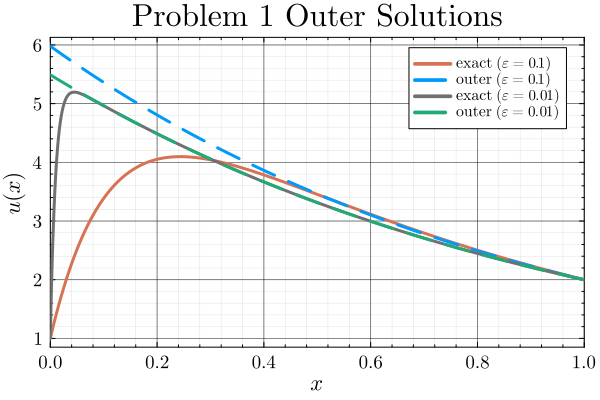

In [75]:
plt2 = plot(sol1,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ)$",
    xlabel = L"$x$", 
    ylabel = L"$u(x)$",
    line = (3, :solid),)
plot!(x, outer.(x, ϵ),
    label="outer "*L"$(\varepsilon=%$ϵ)$",
    line = (3, :dash))
plot!(plt2, sol2,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ2)$",
    xlabel = L"$x$",
    line = (3, :solid),
    title = "Problem 1 Outer Solutions",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm)
plot!(plt2, x, outer.(x, ϵ2),
    label="outer "*L"$(\varepsilon=%$ϵ2)$",
    line = (3, :dash))
# savefig(plt2, "Aero_HW6_Prob1_outer.pdf")
plt2

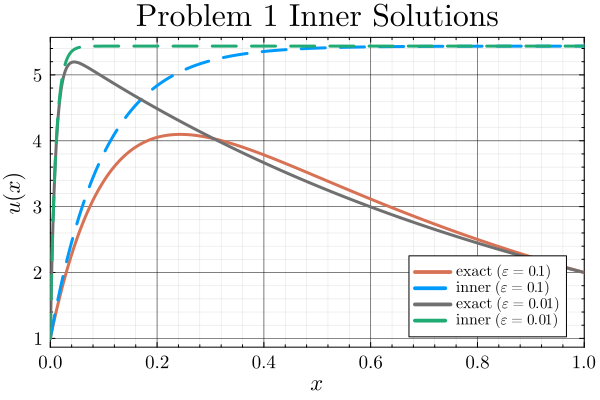

In [83]:
plt3 = plot(sol1,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ)$",
    xlabel = L"$x$", 
    ylabel = L"$u(x)$",
    line = (3, :solid),)
plot!(x, inner.(x, ϵ),
    label="inner "*L"$(\varepsilon=%$ϵ)$",
    line = (3, :dash))
plot!(plt3, sol2,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ2)$",
    xlabel = L"$x$",
    line = (3, :solid),
    title = "Problem 1 Inner Solutions",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm)
plot!(plt3, x, inner.(x, ϵ2),
    label="inner "*L"$(\varepsilon=%$ϵ2)$",
    line = (3, :dash))
# savefig(plt2, "Aero_HW6_Prob1_outer.pdf")
plt3

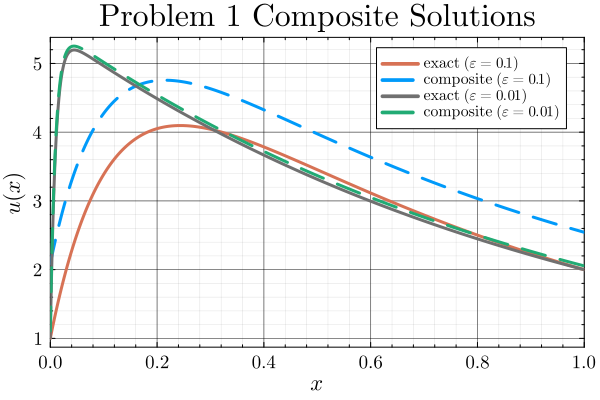

In [85]:
plt4 = plot(sol1,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ)$",
    xlabel = L"$x$", 
    ylabel = L"$u(x)$",
    line = (3, :solid),)
plot!(x, composite.(x, ϵ),
    label="composite "*L"$(\varepsilon=%$ϵ)$",
    line = (3, :dash))
plot!(plt4, sol2,
    idxs=[1],
    label="exact "*L"$(\varepsilon=%$ϵ2)$",
    xlabel = L"$x$",
    line = (3, :solid),
    title = "Problem 1 Composite Solutions",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm)
plot!(x, composite.(x, ϵ2),
    label="composite "*L"$(\varepsilon=%$ϵ2)$",
    line = (3, :dash))
# savefig(plt2, "Aero_HW6_Prob1_outer.pdf")
plt4